##### iris.csv
1. target : species
2. features : sepal_length, sepal_width, petal_length, petal_width
3. standardscaler
4. SVC model

In [22]:
# 1. Load Data
import pandas as pd
irisDF = pd.read_csv("../../DATA/iris.csv")
# irisDF.info()

# 2. Split
# 1) target, feature
target = irisDF.species
feature = irisDF.drop('species', axis=1)
print('Check feature & target :', feature.shape, target.shape)

# 2) train, val, test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, 
                                                    random_state=11, stratify=target)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                                  random_state=11, stratify=y_train)

# 3. Scaling
# 1) check standardized properties
# print('train set :', X_train.mean(), X_train.std())
# print('val set : ', X_val.mean(), X_val.std())
# print('test set : ', X_test.mean(), X_test.std())
# 엥 안된다,, 시리즈로 출력됨

# 2) Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# - print shape
print('X_train_scaled : ', X_train_scaled.shape)
print('X_val_scaled : ', X_val_scaled.shape)
print('X_test_scaled : ', X_test_scaled.shape)

Check feature & target : (150, 4) (150,)
X_train_scaled :  (96, 4)
X_val_scaled :  (24, 4)
X_test_scaled :  (30, 4)


In [23]:
# 4. SVC model
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1.0, random_state=11, probability=True)

# 1) Check performance
model.fit(X_train_scaled, y_train)
print(f'[SVC train score] : {model.score(X_train_scaled, y_train)}')
print(f'[SVC val score] : {model.score(X_val_scaled, y_val)}')
print(f'[SVC test score] : {model.score(X_test_scaled, y_test)}')

# 2) Check Classification Report
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

[SVC train score] : 0.9791666666666666
[SVC val score] : 0.9583333333333334
[SVC test score] : 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



new_data : scaling 해야한다!

In [24]:
# predict proba with new data
new_data = pd.DataFrame([[5, 3, 2, 1]])


# !! scaling !!
new_data_scaled = scaler.transform(new_data)

pd.DataFrame(model.predict_proba(new_data_scaled), columns=irisDF.species.unique())
# virginica 일 확률 99.5% => versicolor : 76.09 %

c:\Users\wjs31\.conda\envs\EXAM_MML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,setosa,versicolor,virginica
0,0.632591,0.312582,0.054827


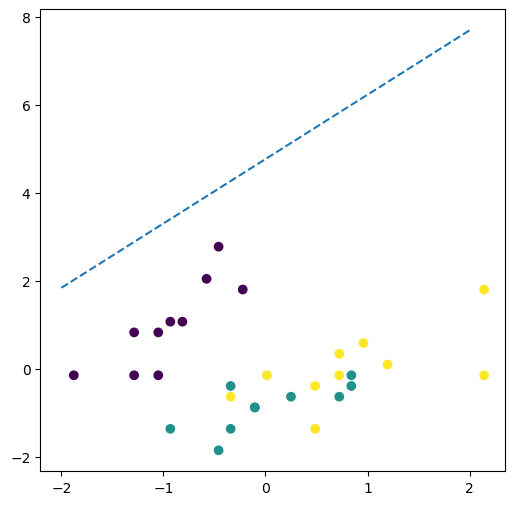

In [25]:
# Visualize SVC with pyplot
import numpy as np
import matplotlib.pyplot as plt

# function2
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x, max_x)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)
    

# 1) Plot SVC
# Switch y_test classes into numbers
y_test_num = y_test.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

plt.figure(figsize=(6, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test_num, cmap='viridis')
# SVC margin line
plot_hyperplane(model, min_x=-2, max_x=2, linestyle='--', label='SVC')
plt.show()

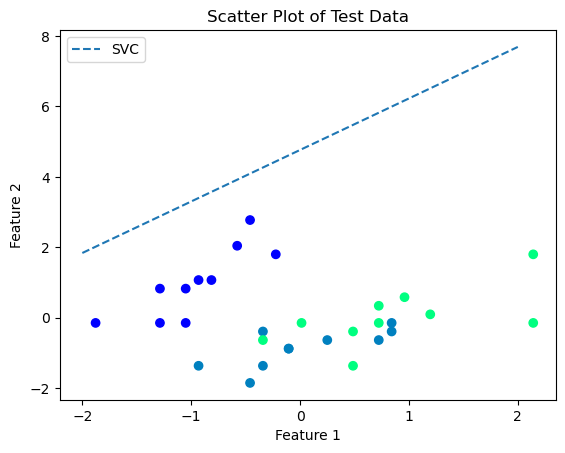

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the separating hyperplane
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x, max_x)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

# Plot the data
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test_num, cmap='winter')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Test Data')

# Plot the SVC with margin line
plot_hyperplane(model, min_x=-2, max_x=2, linestyle='--', label='SVC')

# Show the plot
plt.legend()
plt.show()


<hr>

엉엉 그래프가 안 그려져
=> 이진 분류로 바꿔보기

In [27]:
# Binary Classification : setosa and versicolor
feature2 = irisDF.drop(['species'], axis=1).iloc[:100, :]
target2 = irisDF.iloc[:100, :]['species']

X_train2, X_test2, y_train2, y_test2 = train_test_split(feature2, target2, test_size=0.3, random_state=11)

X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

model2 = SVC(kernel='linear')
model2.fit(X_train2_scaled, y_train2)
y_pred2 = model2.predict(X_test2_scaled)

from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(y_test2, y_pred2))

Accuracy: 1.0


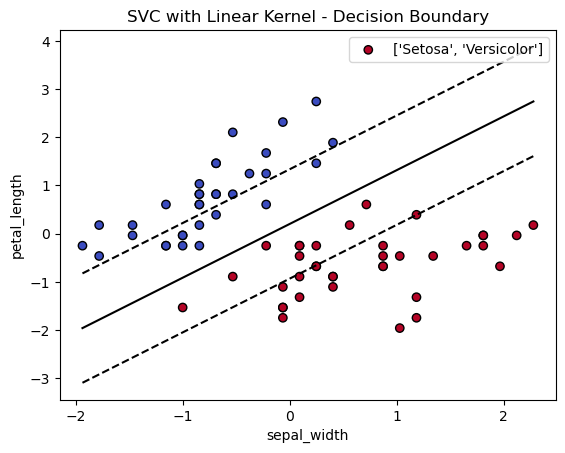

In [28]:
# 결정 경계 그리기
# : 히진 그래프

w = model2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X_train2_scaled[:, 0].min(), X_train2_scaled[:, 0].max())
yy = np.linspace(X_train2_scaled[:, 1].min(), X_train2_scaled[:, 1].max())

y_train2_num = y_train2.map({"setosa": 0, "versicolor": 1})

# Support vectors
margin = 1 / np.sqrt(np.sum(model2.coef_**2))  # 분산
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

# Scatter plot
plt.scatter(
    X_train2_scaled[:, 0],
    X_train2_scaled[:, 1],
    c=y_train2_num,
    cmap=plt.cm.coolwarm,
    edgecolors="k",
    label=["Setosa", "Versicolor"],
)
plt.xlabel(feature.columns[1])
plt.ylabel(feature.columns[2])
plt.legend(loc="upper right")  # 범례 위치 지정
plt.title("SVC with Linear Kernel - Decision Boundary")
plt.show()

<hr>

수업

In [31]:
# Support Vector
print(f'[Support Vector] : {model2.support_vectors_}')
print(f'[Support Vector classes] : {model2.support_}')

[Support Vector] : [[-0.68855812  0.39062169 -0.8841007  -0.57976643]
 [-0.84454217 -0.25024202 -0.95294057 -1.10911839]
 [-1.00052621 -1.53196946  0.21733732  0.30248683]
 [ 0.09136208 -0.46386326  0.42385695  0.83183879]]
[Support Vector classes] : [42 69 38 43]


In [ ]:
# [Draw support vector]
# 1. Check sv
sv = model2.support_vectors_.T
sv[0], sv[1]

(array([-0.68855812, -0.84454217, -1.00052621,  0.09136208]),
 array([ 0.39062169, -0.25024202, -1.53196946, -0.46386326]))

In [ ]:
# How to draw margin line:
# w1*x1 + w2*x2 + b = 0 => x2 = -(w1/w2)*x1 -b/w2


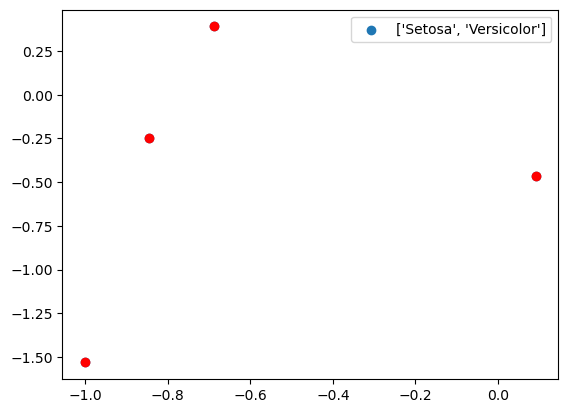

In [ ]:
# 2.
t_data = sv

plt.scatter(x=t_data[0], y=t_data[1], label=['Setosa', 'Versicolor'])
plt.plot(sv[0], sv[1], 'ro')
plt.legend()
plt.show()


<hr>

반장 그래프
- 데이터 수정해서 불러와야함

In [ ]:
df=pd.read_csv('../../DATA/iris.csv', names=["sepal_length","sepal_width","patal_width","patal_length","target"])
feature=df[df.columns[:2]]
target=df[df.columns[-1]]
target.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":1}, inplace=True) # setosa VS versicolor+virginica

clf = SVC(kernel="linear", C=1)       # => 이 부분만 달라짐, 나머지는 고정
clf.fit(feature, target)

w = clf.coef_[0] # 가중치값 구하기
a = -w[0] / w[1] # 기울기값 구하기
xx = np.linspace(4, 8) # x 정의역 설정 
yy = a * xx - (clf.intercept_[0]) / w[1] # 결정 경계 완성!

# 수학적으로 결정 경계(seperating hyperplane) 주변의 서포트 벡터들은
# 거리가 np.sqrt(1 + a**2)만큼 떨어져 있음 
margin = 1 / np.sqrt(np.sum(clf.coef_**2)) # 입실론 설정 = 1/||w|| = 1/가중치 벡터의 놈(norm)
yy_down = yy - np.sqrt(1 + a**2) * margin # 아래 직선
yy_up = yy + np.sqrt(1 + a**2) * margin # 위 직선

plt.plot(xx, yy, "k-") # 결정 경계 그리기
plt.plot(xx, yy_down, "k--") # 주변 서포트 벡터1
plt.plot(xx, yy_up, "k--") # 주변 서포트 벡터2

# 데이터 점들 찍기
plt.scatter(feature["sepal_length"].values,feature["sepal_width"].values, c=target.values)
# 서포트 벡터 머신 표시
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],color="green")
plt.show()

ValueError: could not convert string to float: 'sepal_length'